In [44]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy
import pandas as pd

# mongo configuration
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["TEST"]
mycol = mydb["players"]

#All of teams with red cards
total = [{}]
#Name of teams
teams = [{}]
#Amount of red cards the team has
score ={}

#returns team names
for item in mycol.find({},{ "_id" : 0, "team": 1}):
    teams.append(item)
    
#returns team names and red cards    
for item in mycol.find({},{ "_id" : 0, "team": 1, "red cards" : 1}):
    total.append(item)

In [45]:
#counter
i=0

for row in total:
    for item in row:
        #If the team name matches in both dics and is not empty
        if row["team"]==teams[i]["team"] and row["team"]!='' and isinstance(row["red cards"], int):
            #Team name variable
            team_name=row["team"]
            #If the team name exists
            if team_name in score:
                #Because of the fors, the number is divided by two
                score[team_name]+=row["red cards"]/2
            else:
                score[team_name]=row["red cards"]/2
    i=i+1

In [46]:
#number is rounded, so it parses to int from float, this value is ready for pie chart
#print(round(score["TEAMNAME"])) #for example Atalanta BC

#two dicts for teams that dont have any cards and for teams that have some cards
zero_cards={}
some_cards={}

#sorting the teams based on the number of their card
for k, v in score.items():
    if v == 0:
        zero_cards[k]=v
    else:
        some_cards[k]=v

/home/john/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


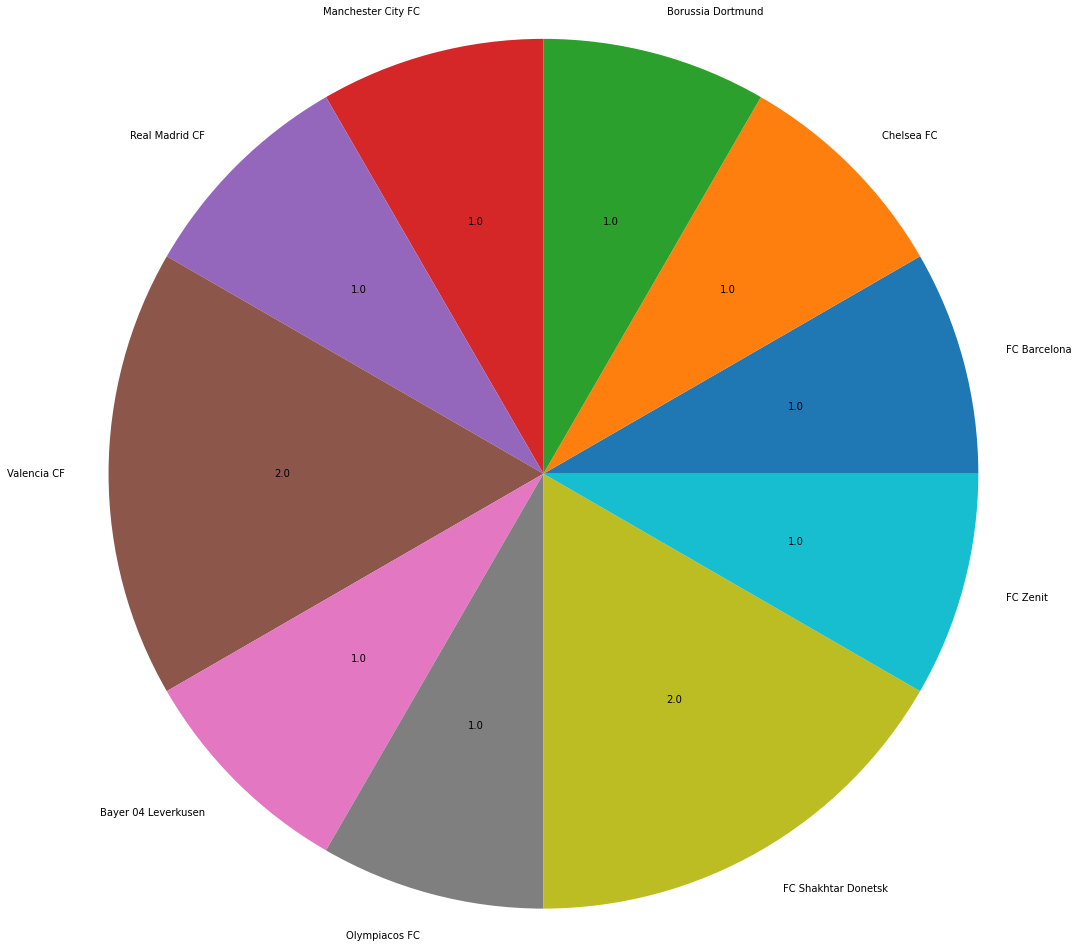

                  Team Name
0               Atalanta BC
1   Club Atlético de Madrid
2                RB Leipzig
3       Paris Saint-Germain
4         FC Bayern München
..                      ...
56                FK Sūduva
57              FK Sutjeska
58        The New Saints FC
59              Valletta FC
60           BSC Young Boys

[61 rows x 1 columns]


In [47]:
#panda dataframe for the pie chart
df=pd.DataFrame(some_cards.items(), columns=['Team Name', 'Num of cards'])

#panda dataframe for teams with zero cards
zr=pd.DataFrame(zero_cards.keys(), columns=['Team Name'])

#function to round up number of cards
def absolute_value(val):
    
    a  = numpy.round(val/100.*df['Num of cards'].sum(), 0)
    return a


plt.pie(
    #the values are number of cards
    df['Num of cards'],
    # with the labels being team names
    labels=df['Team Name'],
    #this prints the number of cards to pie chart
    autopct=absolute_value,
    radius=5
    )

# View the plot
plt.tight_layout()
plt.show()
print(zr)